In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [37]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [38]:
df.shape



(1727, 7)

In [39]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [40]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [41]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [42]:
X = df.drop(['class'], axis=1)

y = df['class']

Split the data set into training and testing data set

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state= 42)



In [44]:
#ordinal encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


columns_to_encode = ['buying','maint', 'doors', 'persons', 'lug_boot', 'safety']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    label_encoder = LabelEncoder()
    X_train[column + '_encoded'] = label_encoder.fit_transform(X_train[column])
    X_test[column + '_encoded'] = label_encoder.transform(X_test[column])

    X_train.drop(column, axis=1, inplace=True)
    X_test.drop(column, axis=1, inplace=True)


X_train.head()








,buying_encoded,maint_encoded,doors_encoded,persons_encoded,lug_boot_encoded,safety_encoded
83,3,3,3,0,1,1
48,3,3,1,2,1,2
468,0,3,1,1,2,2
155,3,0,1,2,1,1
1043,2,0,2,2,2,1


In [46]:
from sklearn.tree import DecisionTreeClassifier


clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)



y_pred_gini = clf_gini.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. 
format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.7965


In [48]:
y_pred_train_gini = clf_gini.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7718


In [49]:

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)


# fit the model
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)


In [50]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8702


In [51]:
y_pred_train_en = clf_en.predict(X_train)


print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))


Training set score: 0.8643
Test set score: 0.8702


Confusion matrix

 [[ 84   0  25  18]
 [ 12   0   0   6]
 [ 13   0 386   0]
 [  0   0   0  26]]


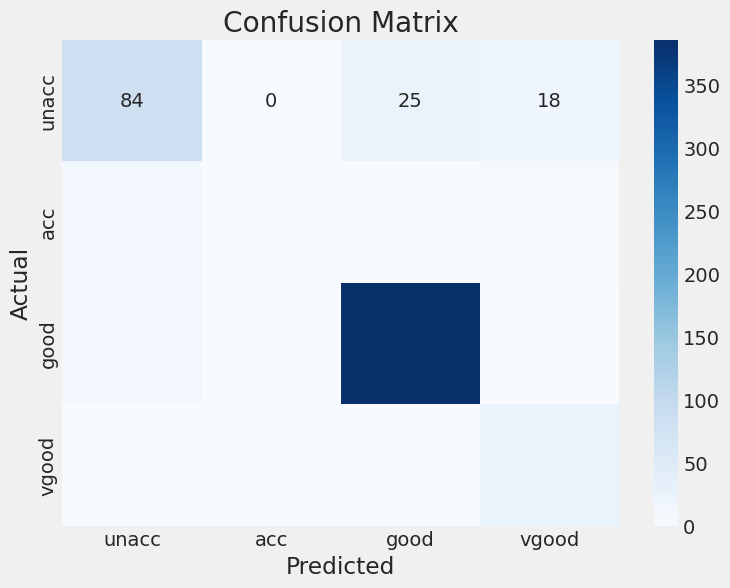

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)


print('Confusion matrix\n\n', cm)


labels = ['unacc', 'acc', 'good', 'vgood']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.77      0.66      0.71       127
        good       0.00      0.00      0.00        18
       unacc       0.94      0.97      0.95       399
       vgood       0.52      1.00      0.68        26

    accuracy                           0.87       570
   macro avg       0.56      0.66      0.59       570
weighted avg       0.85      0.87      0.86       570



/home/ashertopaz/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashertopaz/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashertopaz/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
